# Machine Learning - Gradient Descent Optimization and Normal Equation to Find Optimum Solution in a Simple Regression Case

The objective of this mini project is to implement a proper mathematical gradient-based optimization algorithm in order to find the optimum intercept and coefficient value in a simple univariate regression model. Moreover, the comparison of the result of the optimum solution and the mean squared error between scikit-learn library, gradient descent method, and normal equation will be investigated.

The data being used in this mini project is provided by RestaurantData.txt, in which the correlation between city populations and a restaurant franchise profit is investigated. Note that the data in both city population and the profit should be multiplied by 10000.

First, read the data using pandas library.

In [121]:
import pandas as pd
import numpy as np

df = pd.read_csv('RestaurantData.txt',names=["CityPopulation", "RestaurantProfit"])

To get a better sense of the dataframe, print the first five rows of the data.

In [122]:
df.head()

,CityPopulation,RestaurantProfit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


We can see the correlation between two variables by plotting the values.

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0, 0.5, 'Restaurant Profit in $10000')

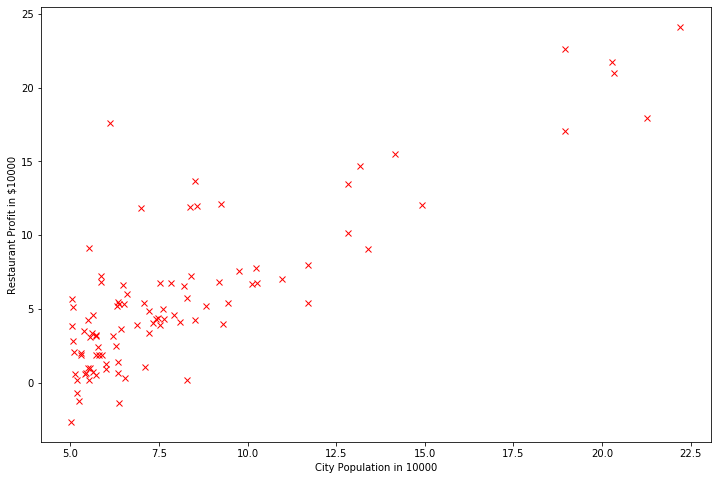

In [149]:
plt.figure(figsize=(12, 8))
plt.plot(df["CityPopulation"],df["RestaurantProfit"],'rx')
plt.xlabel('City Population in 10000')
plt.ylabel('Restaurant Profit in $10000')

From the figure above, it is very clear that the two variables have a positive correlation. By looking at the variance of the dataset, we can conclude that using a linear regression would be the best model to represent the relationship between two variables.

Now, let's build a linear regression model with scikit-learn library and its built-in function. 

## Using Scikit-learn Library

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lm = LinearRegression()

Now initialize our data with x being the features or predictor and y is the response or target.

In [127]:
X = df[['CityPopulation']]
Y = df['RestaurantProfit']

Lets divide the x dataset into training set and test set, with 80% of them being training set.

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state=1)

Then, using the fit() function, we tell our linear regression model to learn the pattern in our data.

In [130]:
lm.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Having run the function above, now we get a mathematical regression equation. Since we only define one predictor (city population), then the regression model will look something like this:

$$
Y = a + b.X
$$

where a is called intercept and b is called coefficient. 

After running the above function, the fit() function will automatically give us an optimum value for both intercept and coefficient values. In fact, we can check the value of the intercept and coefficient with the following commands:

In [131]:
lm.intercept_

-3.835478526683641

In [132]:
lm.coef_

array([1.19613297])

As we can see, the optimum values for intercept and coefficient are -3.83 and 1.19, respectively. Pluging these values into the regression equation, we get:

$$
Y = -3.83 + 1.19. X
$$

Thus, for every value of X, the target value Y can be determined easily. Afterwards, we can test the quality of our model to predict the sample in the test set.

In [133]:
Yhat=lm.predict(xTest)

We can check the quality of our model by calculating the Mean Squared Error of the model.

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
(mean_squared_error(yTest,Yhat))/2

4.431142101287223

## Using Gradient Descent Method

The mean squared error of the model with scikit-learn library is 4.43, which is very good, indicating that the model is appropriate to represent the data.

With scikit-learn library, building a regression model and then using it to predict the target value is very easy to be done. There is no need to learn about convoluted mathematical equation to come up with the solution. However, there is one thing that really draws the interest.

Based on above methods, one might be wondering where the intercept value = -3.83 and coefficient value 1.19 comes from. **How come the algorithm decides that -3.83 and 1.19 are the optimum values for this problem?** The gradient descent optimiziation method and normal equation method might be the answer of this question.

To be brief, gradient descent method is an iterative optimization algorithm to find best optimum solution,i.e minimizing the cost function $J(\theta)$. The algorithm can be seen in the following equations.

$$J(\theta_0,\theta_1)=\frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)})-y^{(i)})^2$$
where:
$$h_\theta(x) = \theta_0 + \theta_1 x$$

After computing the cost function, then we can use the partial derivative of $\theta$ to compute the gradient. With this gradient, we can modify the current value of $\theta$ in every iteration.
$$\theta_j:=\theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)$$

where $\theta_0$ is our intercept value, $\theta_1$ is our coefficient value, $\alpha$ is the learning rate, and h is our linear regression model. In gradient descent method, the value of both theta will be updated in each iteration simultaneously until their values converge and the mean squared error $J$ is minimized. The following is the implementation of gradient descent method.

First, initialize the predictor and target values both in training set and test set. 

In [136]:
xTrainGD = xTrain.values
yTrainGD = yTrain.values
xTestGD = xTest.values
yTestGD = yTest.values

Then manipulate the necessary data for the algorithm to work properly, e.g the creation of matrices for vectorization.

In [137]:
interceptTrain = np.ones((len(xTrainGD),1))
interceptTest = np.ones((len(xTestGD),1))
xTrainGD = np.column_stack((interceptTrain,xTrainGD))
xTestGD = np.column_stack((interceptTest,xTestGD))
yTrainGD = yTrainGD.reshape((len(yTrainGD),1))
yTestGD = yTestGD.reshape((len(yTestGD),1))

Then initialize the necessary variables like the number of iterations, learning rate $\alpha$, and the length of training data.

In [138]:
alpha = 0.01
numOfIterations = 10000
thetaTrain = np.zeros((len(xTrainGD[0]),1))
noOfTraining = len(yTrainGD)
noOfTest = len(yTestGD)

Define a function to compute mean squared error $J$ in every iterations.

In [139]:
def computeCostFunction(x, y, theta, noOfExperiments):
    
    hypothesisFunct = np.matmul(x,theta)
    error = np.subtract(hypothesisFunct,y) 
    errorSquared = error.transpose()**2 
    costFunct = (0.5/noOfExperiments)*(np.sum(errorSquared))
    
    return costFunct

Then define a function to perform gradient descent algorithm that updates all values of $\theta$ simultaneously in every iterations.

In [140]:
def gradientDescent(x, y, theta, alpha, noOfExperiments, iterations):
    
    JHistory = np.zeros((iterations,1))
    
    for i in range (iterations):
        
        hypothesisFunct= np.matmul(x,theta)
        error = np.subtract(hypothesisFunct,y) 

        derivSlope = np.matmul(x.transpose(),error)
        theta = theta - (alpha*(1/noOfExperiments)*derivSlope)
        
        JHistory[i] = computeCostFunction(x, y, theta, noOfExperiments)
        
    return theta, JHistory

Then, call the gradient descent function to obtain the optimum value of both theta, which is the intercept value and coefficient value of the model.

In [141]:
thetaGradientDesc, JHistory = gradientDescent(xTrainGD, yTrainGD, thetaTrain, alpha, noOfTraining, numOfIterations)
thetaGradientDesc

array([[-3.83547852],
       [ 1.19613297]])

From the result above, we see that we got an array of -3.8354 and 1.19 as a result. This means that we got -3.89 as an intercept value and 1.19 for coefficient value. Both values correspond perfectly with the values that we got from scikit-learn library. However this time we know completely where these values come from!

Moreover, we could also check the mean squared error from the test set with this $\theta_0$ and $\theta_1$.

In [142]:
J = computeCostFunction(xTestGD, yTestGD, thetaGradientDesc, noOfTest)
J

4.431142101815195

As we can see above, the mean squared error is 4.43, which also corresponds perfectly with mean squared error we got from the scikit library!

Now lets try to plot it to check whether our solution is the global optimum solution. First lets define a function to create a 3D plot.

In [143]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

def plotContour(theta1Val, theta2Val, JVal, x, y, noOfTraining):
    
    for i in range (len(theta1Val)):
        for j in range (len(theta2Val)):
        
            thetaAll = np.array([[theta1Val[i]],[theta2Val[j]]])

        
            JVal[i,j] = computeCostFunction(x, y, thetaAll, noOfTraining)

            
    fig = plt.figure(figsize=(10,6))
    ax = Axes3D(fig)
    ax.plot_surface(theta1Val, theta2Val, JVal, cmap=cm.jet, linewidth=0.1)
    ax.view_init(30,100)
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.show()

Then, initialize a value of both $\theta$ with linear distribution. With every value of $\theta$, the corresponding cost function will be stored in a matrix as showed above.

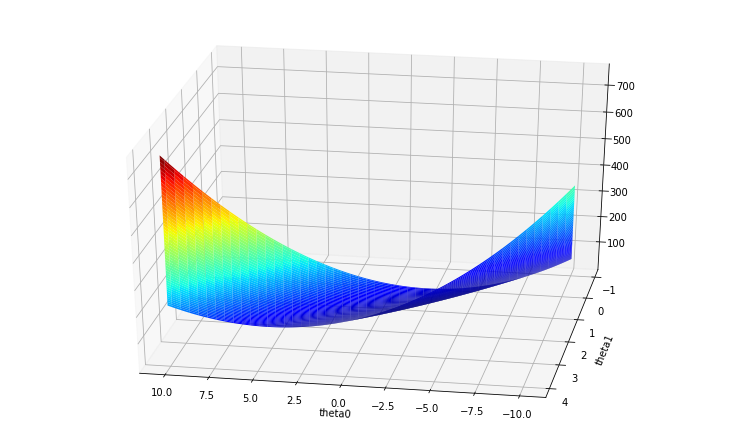

In [144]:
theta1Val = np.linspace(-10,10, num=100)
theta2Val = np.linspace(-1,4, num=100)
Jval = np.zeros((len(theta1Val),len(theta2Val)))

plotContour(theta1Val, theta2Val, Jval, xTrainGD, yTrainGD, noOfTraining)
        

As we have seen above, linear regression is a convex problem and the value of $\theta_0$ = -3.383 and $\theta_1$ = 1.196 totally correspond to the global solution.

## Using Normal Equation

Another method that can be used to find an optimum soution of $\theta$ is normal equation. Unlike gradient descent method, using normal equation doesn't require any loop or iterative steps. Normal equation is a closed form solution for regression problem based on linear algebra theory. One advantage of using this equation is that we don't need to normalize any feature.

The equation of normal equation is:
$$\theta=(X^TX)^{-1}X^Ty$$

So now lets create a function to compute normal equation as shown above.

In [145]:
def normalEquation(x, y):
    
    xTranspose = x.transpose()
    xmatMult = np.matmul(xTranspose,x)
    xmatMultInv = np.linalg.inv(xmatMult)
    xmatMult2 = np.matmul(xmatMultInv,xTranspose)
    
    theta = np.matmul(xmatMult2,y)
    
    return theta

Then call the function normalEquation to find the optimum solution of $\theta$ using the training set.

In [146]:
thetaNormEq = normalEquation(xTrainGD, yTrainGD)
thetaNormEq

array([[-3.83547853],
       [ 1.19613297]])

As we can see, both $\theta_0$ and $\theta_1$ showed the exact same result as both scikit-learn library and gradient descent optimization result. Finally, we can compute the mean squared error of this approach on test set.

In [147]:
J = computeCostFunction(xTestGD, yTestGD, thetaNormEq, noOfTest)
J

4.431142101287223

From the investigation above, it can be concluded that the result from all of the scikit-learn library, gradient descent optimization method, and normal equation are similar. While we can agree that using scikit-learn library is the simplest approach to come to the final solution, but it is nice to know the regression problem algorithm beyond applying fit() function and predict() function as our 'black-box'.

Finally, we can plot our linear regression model.

Text(0, 0.5, 'Restaurant Profit in $10000')

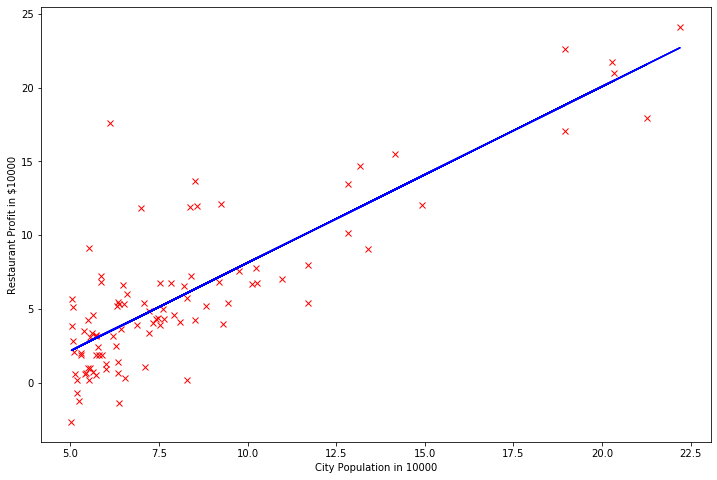

In [150]:
flip = np.flip(thetaGradientDesc.transpose()).reshape((2,))
normEqPolyFit = np.poly1d(flip)
plt.figure(figsize=(12, 8))
plt.plot(X,Y,'rx', X,normEqPolyFit(X),'-b')
plt.xlabel('City Population in 10000')
plt.ylabel('Restaurant Profit in $10000')